In [2]:
import random

import keras.models
from skimage.io import imshow

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tools import sources
from tools import unetmodel
from tools import rect

from skimage.transform import resize

%load_ext autoreload
%autoreload 2

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

X_train, Y_train = sources.flattened_trainset(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 64)

100%|██████████| 64/64 [00:33<00:00,  1.91it/s]


In [4]:
X_train.shape

(64, 128, 128, 3)

In [9]:
def show_imgs(imgs, titles=None):
    n = len(imgs)
    _, axs = plt.subplots(ncols=n, figsize=(15, 5))
    
    for ix, ax in enumerate(axs):
        ax.imshow(imgs[ix])
        ax.axis('off')
        
        if titles:
            ax.set_title(titles[ix])

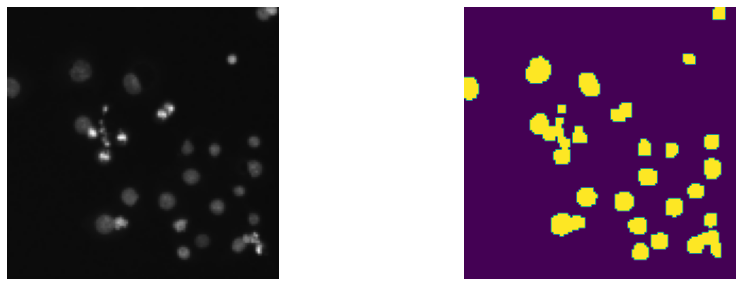

In [6]:
show_imgs([X_train[0], Y_train[0]])

In [24]:
model_1 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-1.h5')
predicted_1 = model_1.predict(X_train)

OSError: SavedModel file does not exist at: /home/jupyter/dsb-2018/models/model-dsbowl2018-unet-1.h5/{saved_model.pbtxt|saved_model.pb}

In [7]:
model_2 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-overfit.h5')
predicted_2 = model_2.predict(X_train)

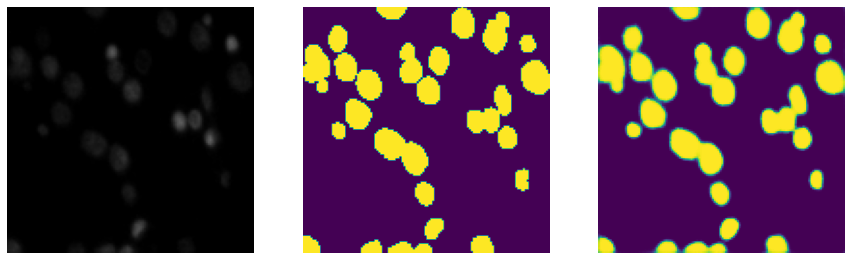

In [8]:
ix = 22
# show_imgs([X_train[ix], Y_train[ix], predicted_1[ix], predicted_2[ix]])
show_imgs([X_train[ix], Y_train[ix], predicted_2[ix]])

In [23]:
r1 = ((Y_train[:32] - predicted_1[:32]) ** 2).mean(axis=(1, 2, 3))
r1

array([0.02713792, 0.00097625, 0.00831638, 0.0156365 , 0.01742809,
       0.011264  , 0.01522762, 0.00935797, 0.00636636, 0.01074555,
       0.06262282, 0.01403304, 0.14110012, 0.02319601, 0.0191614 ,
       0.067409  , 0.06784721, 0.06563464, 0.01665719, 0.00648588,
       0.01287   , 0.0866657 , 0.03504748, 0.05963057, 0.05171847,
       0.02788355, 0.01191517, 0.00504605, 0.03366991, 0.01451792,
       0.03389062, 0.04314997], dtype=float32)

In [25]:
r2 = ((Y_train[:32] - predicted_2[:32]) ** 2).mean(axis=(1, 2, 3))
r2

array([0.02221328, 0.00090102, 0.00344865, 0.0074031 , 0.01499624,
       0.00760896, 0.00908888, 0.00540221, 0.00355493, 0.00786528,
       0.05936449, 0.00550883, 0.14844388, 0.01337521, 0.01599938,
       0.06064946, 0.05862548, 0.05686176, 0.00751553, 0.00619674,
       0.00727968, 0.08968046, 0.02421311, 0.063518  , 0.04013485,
       0.0158869 , 0.00829267, 0.0046313 , 0.02772095, 0.0082761 ,
       0.01363956, 0.0461795 ], dtype=float32)

In [26]:
r1 - r2

array([ 4.92463447e-03,  7.52284541e-05,  4.86772694e-03,  8.23339354e-03,
        2.43184716e-03,  3.65503971e-03,  6.13873824e-03,  3.95576097e-03,
        2.81143561e-03,  2.88027339e-03,  3.25832143e-03,  8.52420740e-03,
       -7.34375417e-03,  9.82080586e-03,  3.16201150e-03,  6.75954297e-03,
        9.22172889e-03,  8.77287984e-03,  9.14166402e-03,  2.89145391e-04,
        5.59031405e-03, -3.01475823e-03,  1.08343735e-02, -3.88743728e-03,
        1.15836188e-02,  1.19966567e-02,  3.62249836e-03,  4.14753798e-04,
        5.94895519e-03,  6.24181982e-03,  2.02510618e-02, -3.02953273e-03],
      dtype=float32)

In [7]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

tx, ty, tc, tw, th, tdx, tdy, _, _ = sources.flattened_trainset_ex(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 64)

100%|██████████| 64/64 [00:31<00:00,  2.01it/s]


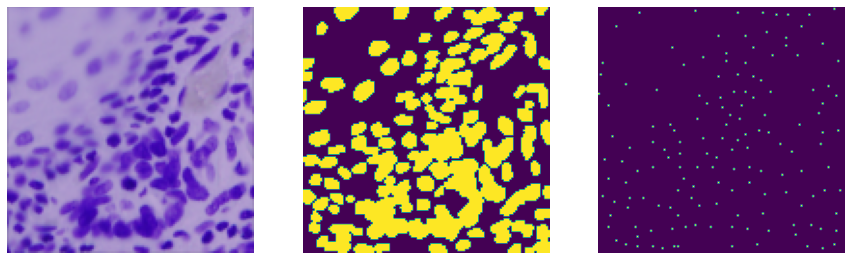

In [10]:
ix = 12
show_imgs([X_train[ix], Y_train[ix], tc[ix]])

## Plotting data from extended dataset

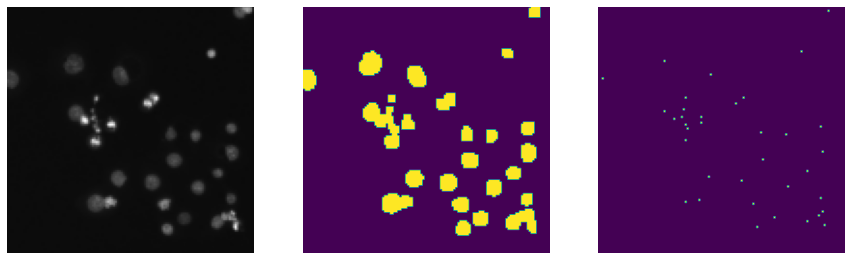

In [15]:
ix = 0
show_imgs([X_train[ix], Y_train[ix], tc[ix]])

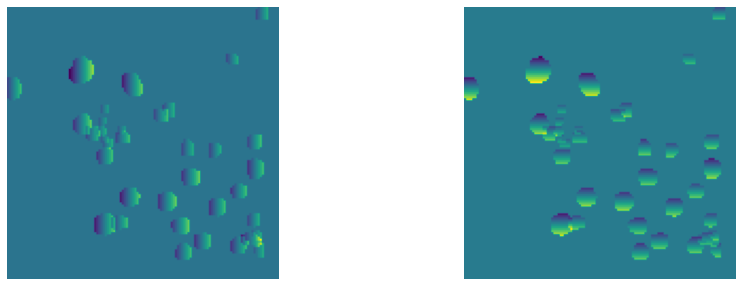

In [16]:
ix = 0
show_imgs([tdx[ix], tdy[ix]])

In [109]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

ztx, zty, ztc, ztw, zth, ztdx, ztdy, zmasks, _ = sources.flattened_trainset_ex(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 1)

100%|██████████| 1/1 [00:00<00:00,  6.27it/s]


In [111]:
len(zmasks[0])

36

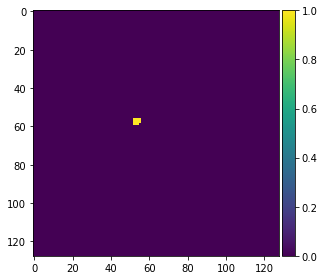

In [112]:
imshow(zmasks[0][0])

In [113]:
for mix in range(len(zmasks[0])):
    (minx, maxx), (miny, maxy) = sources.inclusive_bounds(zmasks[0][mix])
    if miny > 80 and maxx < 64: # and minx > 30 and maxy < 60:
        print((minx, maxx), (miny, maxy))

        print(mix)

(49, 56) (98, 104)
1
(41, 50) (97, 107)
12
(53, 62) (85, 93)
25


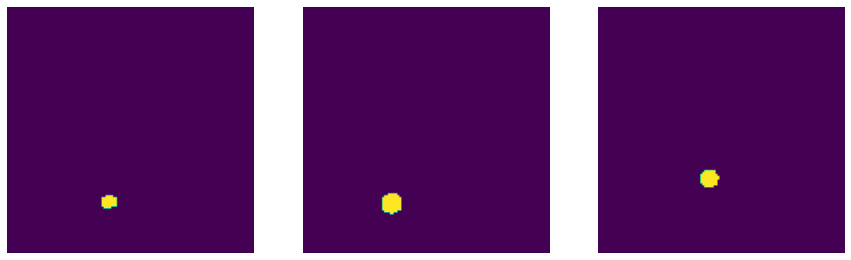

In [114]:
show_imgs([zmasks[0][1], zmasks[0][12], zmasks[0][25]])

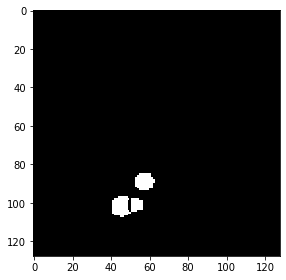

In [115]:
# Trying to zoom in to the section where there appears to be overlap, and indeed there is overlap!

imshow(zmasks[0][1] ^ zmasks[0][12] ^ zmasks[0][25])

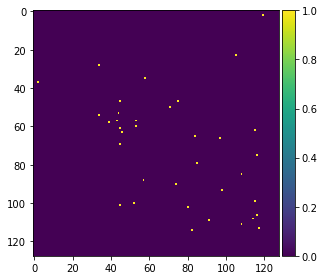

In [116]:
ppp = (np.abs(ztdx[ix]) <= 1.5) * (np.abs(ztdy[ix]) <= 1.5) * (zty[ix]>=0.01)
ppp = zty[ix] > 0.95
ppp = ztc[ix]
ppp = ztc[ix] * (zty[ix] > 0.95) > 0
#ppp = (np.abs(dx[ix]) <= 1.5) * (np.abs(dy[ix]) <= 1.5) * (mask[ix]>=0.90)
imshow(ppp)

In [117]:
rects = []
for x in range(128):
    for y in range(128):
        if ppp[x, y] > 0:
            w = ztw[ix][x, y]
            h = zth[ix][x, y]
            if w * h >= 1:
                rects.append((int(y-h/2), int(y+h/2), int(x-w/2), int(x+w/2)))
                #rects.append((x, x+1, y, y+1))
                #rects.append((y, y+1, x, x+1))

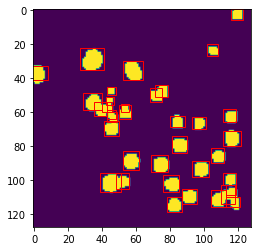

In [118]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(zty[ix])

for (x1, x2, y1, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((x1,y1),int(x2-x1+1),int(y2-y1+1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

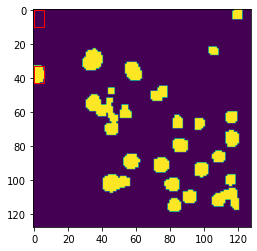

In [67]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(zty[ix])

ax.add_patch(patches.Rectangle((0,33), 6-0, 43-33,linewidth=1,edgecolor='r',facecolor='none'))
ax.add_patch(patches.Rectangle((0,0), 6-0, 43-33,linewidth=1,edgecolor='r',facecolor='none'))


plt.show()

In [74]:
for mix in range(len(zmasks)):
    bs = sources.inclusive_bounds(zmasks[mix])
    (minx, maxx), (miny, maxy) = bs
    if maxx < 20:
        print(bs)

        print(mix)
        break

((0, 6), (33, 43))
3


In [79]:
sources.bounds_center(bs), sources.bounds_size(bs)

((2, 37), (7, 11))

In [83]:
int(2-7/2.0-1), int(2+7/2.0-1)

(-2, 4)

In [89]:
int(7 / 2 + 0.5)

4

In [78]:
zty[ix][37,6]

array([ True])

# Further iteration of dataset

In [136]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

ztx, zty, zto, ztdx1, ztdy1, ztdx2, ztdy2, _, _ = sources.flattened_trainset_ex_2(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 1)

100%|██████████| 1/1 [00:00<00:00,  5.73it/s]


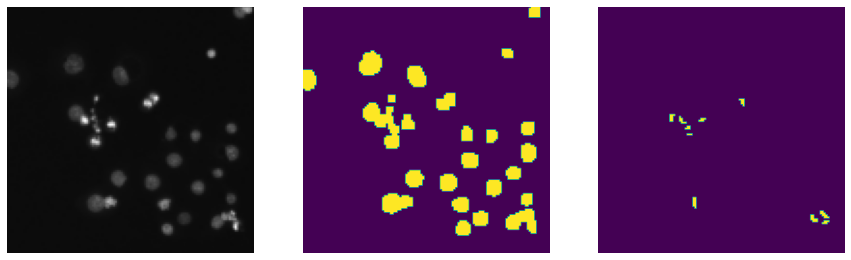

In [137]:
ix = 0
show_imgs([ztx[ix], zty[ix], zto[ix]])

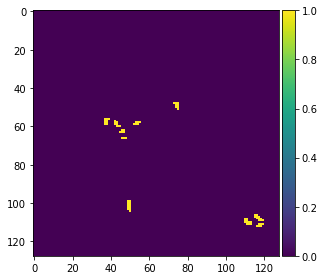

In [135]:
imshow(zto[ix]>1.0)

In [140]:
ix = 0
rects = []
for x in range(128):
    for y in range(128):
        if zty[ix][y, x] > 0 and zto[ix][y, x] < 0.5:
            rects.append((int(x-ztdx1[ix][y,x]), int(x-ztdx2[ix][y,x]), int(y-ztdy1[ix][y,x]), int(y-ztdy2[ix][y,x])))


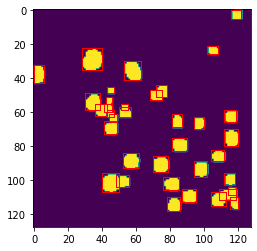

In [141]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(zty[ix])

for (x1, x2, y1, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((x1,y1),int(x2-x1+1),int(y2-y1+1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

# Extended UNet model 2

In [6]:
from keras import backend as K

def mean_squared_error_masked(y_true, y_pred):
    mask = K.sign(K.abs(y_true))
    return K.sum(K.square(y_pred - y_true) * mask, axis=-1) / (K.sum(mask, axis=-1) + 0.1)

model_ext_2 = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-ext_2.h5', custom_objects={'mean_squared_error_masked': mean_squared_error_masked})
predicted_ext_2 = model_ext_2.predict(X_train)

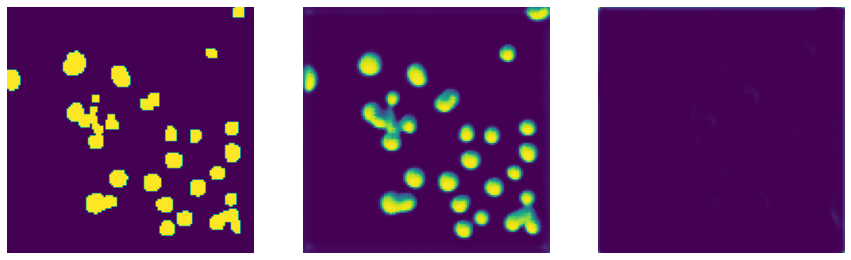

In [13]:
ix = 0
m2y, m2o, m2x1, m2y1, m2x2, m2y2 = predicted_ext_2
show_imgs([ty[ix], m2y[ix], m2o[ix]])

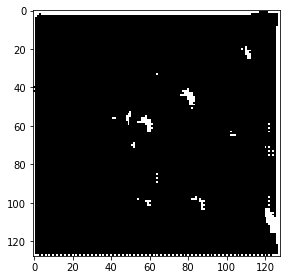

In [19]:
imshow(m2o[ix]>0.001)
#m2o[ix].min()

# Extended UNet model

In [11]:
from keras import backend as K

def mean_squared_error_masked(y_true, y_pred):
    mask = K.sign(K.abs(y_true))
    return K.sum(K.square(y_pred - y_true) * mask, axis=-1) / (K.sum(mask, axis=-1) + 0.1)

model_ext = keras.models.load_model(sources.MODEL_PATH + '/model-dsbowl2018-unet-ext.h5', custom_objects={'mean_squared_error_masked': mean_squared_error_masked})
predicted_ext = model_ext.predict(X_train)

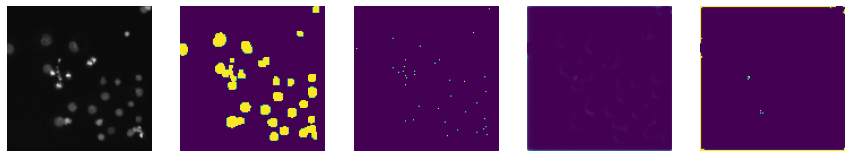

In [12]:
ix = 0
mask, center, widths, heights, dx, dy = predicted_ext
show_imgs([X_train[ix], Y_train[ix], tc[ix], center[ix], center[ix]>0.01])

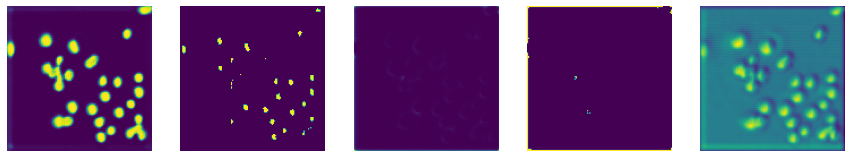

In [13]:
show_imgs([mask[ix], mask[ix]>=0.99, center[ix], center[ix]>0.01, widths[ix]])

In [28]:
mask[ix]

array([[[0.22231412],
        [0.13013989],
        [0.09347695],
        ...,
        [0.8599504 ],
        [0.7195311 ],
        [0.67736644]],

       [[0.15830334],
        [0.0993423 ],
        [0.11584806],
        ...,
        [0.95177585],
        [0.8546643 ],
        [0.80284786]],

       [[0.15440983],
        [0.14011097],
        [0.14641784],
        ...,
        [0.97324276],
        [0.9179013 ],
        [0.84386116]],

       ...,

       [[0.12166303],
        [0.14183255],
        [0.19077033],
        ...,
        [0.05294098],
        [0.0439771 ],
        [0.06085441]],

       [[0.10933831],
        [0.10187565],
        [0.08618854],
        ...,
        [0.03195082],
        [0.03176163],
        [0.05725236]],

       [[0.15414736],
        [0.10282549],
        [0.08713731],
        ...,
        [0.03685263],
        [0.05440129],
        [0.07846054]]], dtype=float32)

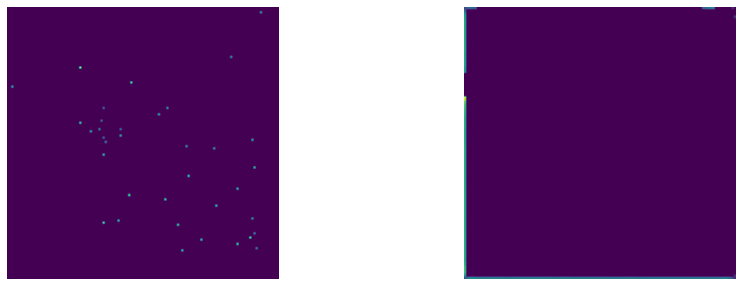

In [15]:
show_imgs([tw[ix], widths[ix] * (center[ix]>=0.02)])

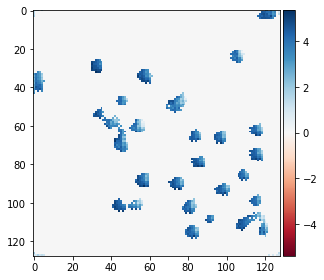

In [96]:
imshow(weights[ix] * (center[ix]>=0.02))

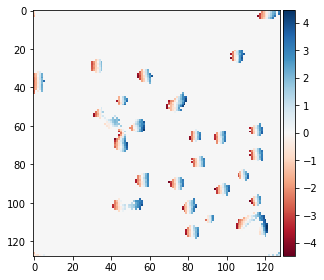

In [101]:
imshow(dx[ix] * (center[ix]>=0.02))

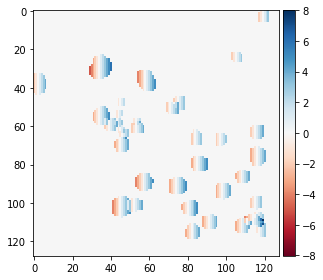

In [14]:
imshow(tdx[ix])

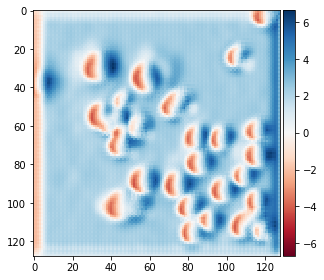

In [47]:
imshow(dx[ix])

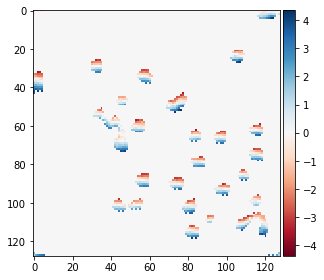

In [127]:
imshow(dy[ix] * (center[ix]>=0.02))

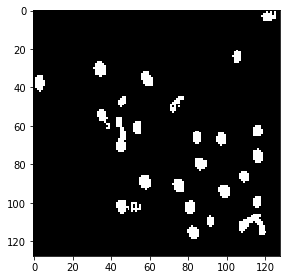

In [54]:
ppp = (np.abs(dx[ix]) <= 1.5) * (np.abs(dy[ix]) <= 1.5) * (center[ix]>=0.01)
ppp = mask[ix] > 0.95
ppp = center[ix]
ppp = center[ix] * (mask[ix] > 0.95) > 0
#ppp = (np.abs(dx[ix]) <= 1.5) * (np.abs(dy[ix]) <= 1.5) * (mask[ix]>=0.90)
imshow(ppp)

In [49]:
rects = []
for x in range(128):
    for y in range(128):
        if ppp[x, y] > 0:
            w = widths[ix][x, y]
            h = heights[ix][x, y]
            if w * h >= 1:
                rects.append((int(y-h/2), int(y+h/2), int(x-w/2), int(x+w/2)))
                #rects.append((x, x+1, y, y+1))
                #rects.append((y, y+1, x, x+1))

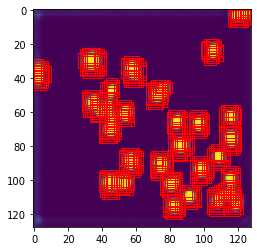

In [50]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(mask[ix])

for (x1, x2, y1, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((x1,y1),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [204]:
trects = []
for x in range(128):
    for y in range(128):
        if tc[ix][y, x] > 0:
            w = tw[ix][y, x]
            h = th[ix][y, x]
            if w * h >= 1:
                trects.append((int(x+1-w/2), int(y+1-h/2), int(w), int(h)))

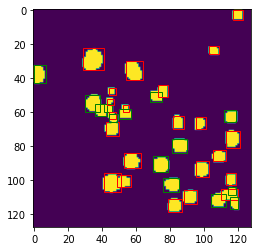

In [205]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(ty[ix])

for (x, y, w, h) in trects:
    # Create a Rectangle patch and add patch to Axes
    if w % 2 == 1:
        ax.add_patch(patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='g',facecolor='none'))
    else:
        ax.add_patch(patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

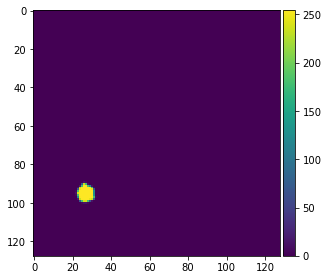

In [200]:
from skimage.io import imread

mx = imread('../../dsb-2018/stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png')

mx = resize(mx, (128, 128), mode='constant', preserve_range=True)

imshow(mx)

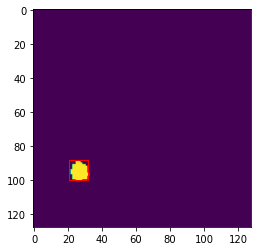

In [201]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
zz = mx > 0

bs = sources.inclusive_bounds(mx>0)
x, y = sources.bounds_center(bs)
w, h = sources.bounds_size(bs)
#for y in range(180, 199+1):
#    for x in range(46, 63+1):
#        zz[y, x] = 1

ax.imshow(zz)
#ax.add_patch(patches.Rectangle((46-1,180-1),63-46+1,199-180+1,linewidth=1,edgecolor='r',facecolor='none'))
ax.add_patch(patches.Rectangle((x - w/2,y - h/2),w,h,linewidth=1,edgecolor='r',facecolor='none'))


plt.show()

In [162]:
np.max(mx, axis=0).argmax()

46

In [158]:
np.array([0, 1, 1, 0]).argmax()

1

In [ ]:
# collect code

n = 14
diffx = np.squeeze(pred_ext[4][n])
diffy = np.squeeze(pred_ext[5][n])
glagla = ((np.abs(diffx) < 1) & (np.abs(diffy) < 1)).astype('float')
widths = np.squeeze(pred_ext[2][n])
heights = np.squeeze(pred_ext[3][n])

rows, cols = np.where((np.abs(diffx) < 1) & (np.abs(diffy) < 1))
brects = [(x, y, widths[y, x], heights[y, x]) for (y, x) in zip(rows, cols) if widths[y, x] > 2 and heights[y, x] > 2]
rects = [(max(0, x - w/2), max(0, y - h/2), x + w/2, y + h/2) for (x, y, w, h) in brects]

mask_pred = pred_ext[0][n]
rects = [(x1, y1, x2, y2) for (x1, y1, x2, y2) in rects if mask_pred[int(y1):int(y2), int(x1):int(x2)].mean() >= 0.5]
rects = sorted(rects)

rects = rect.merge(rects)

import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.squeeze(pred_ext[0][n]))

for (x1, y1, x2, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((int(x1),int(y1)),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [121]:
# Going to center
z = np.zeros((128, 128))
z2 = np.zeros((128, 128))

             
for x in range(128):
    for y in range(128):
        if center[ix][x, y] >= 0.02:
            z[int(x - dx[ix][x, y]), y] += 1
            z2[x, y] += 1

/opt/conda/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


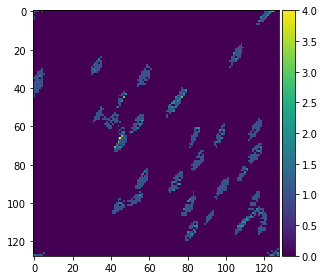

In [120]:
imshow(z)

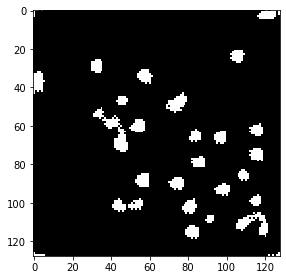

In [122]:
imshow(z2)

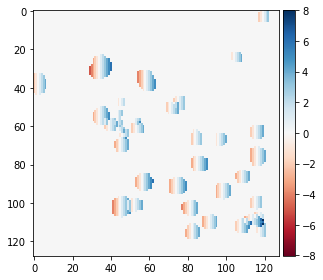

In [99]:
imshow(tdx[ix])

In [85]:
np.histogram(tw[ix])

(array([16348,    11,     5,     7,     0,     7,     3,     2,     0,
            1]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]))

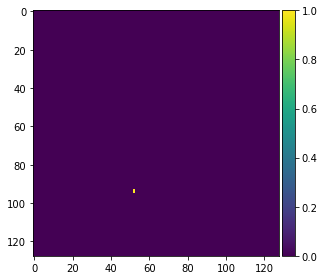

In [82]:
imshow(weights[ix]>8)

In [78]:
weights[ix]

array([[[ 0.8798344 ],
        [ 1.9424541 ],
        [ 1.9117515 ],
        ...,
        [ 1.839207  ],
        [ 0.5320962 ],
        [-0.35770208]],

       [[ 1.4682474 ],
        [ 2.7317297 ],
        [ 2.8118107 ],
        ...,
        [ 3.662307  ],
        [ 2.1562402 ],
        [ 1.0557842 ]],

       [[ 1.4897856 ],
        [ 2.9645283 ],
        [ 3.215569  ],
        ...,
        [ 3.3533113 ],
        [ 2.8896935 ],
        [ 1.401673  ]],

       ...,

       [[ 2.12887   ],
        [ 2.6612911 ],
        [ 3.6721115 ],
        ...,
        [ 2.9225528 ],
        [ 2.449392  ],
        [ 1.7372221 ]],

       [[ 1.9052683 ],
        [ 2.518162  ],
        [ 2.9794612 ],
        ...,
        [ 2.3333313 ],
        [ 1.943327  ],
        [ 1.4251263 ]],

       [[ 1.1301682 ],
        [ 0.9282696 ],
        [ 1.6366962 ],
        ...,
        [ 1.1457402 ],
        [ 0.8768701 ],
        [ 1.0140997 ]]], dtype=float32)

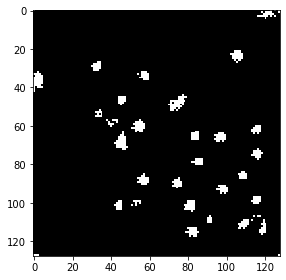

In [69]:
imshow(center[ix]>0.04)

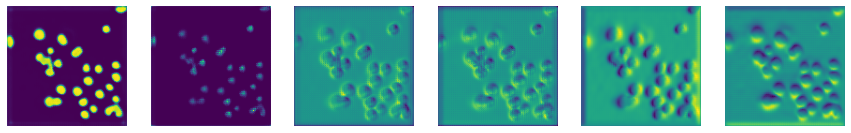

In [56]:
ix = 0
outs = [out[ix] for out in predicted_ext]
show_imgs(outs)

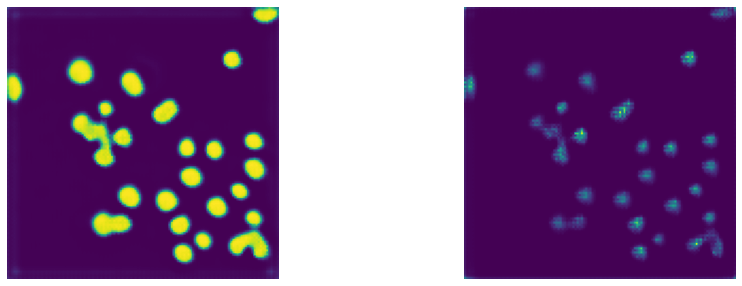

In [60]:
show_imgs(outs[:2])

In [18]:
ix = 1#random.randint(0, X_train.shape[0])


/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


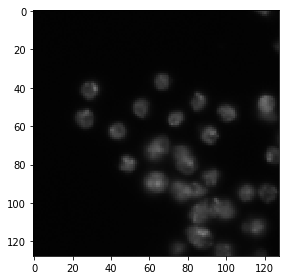

In [19]:
imshow(X_train[ix])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


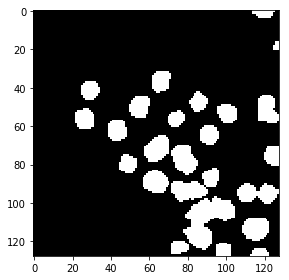

In [20]:
imshow(np.squeeze(Y_train[ix]))

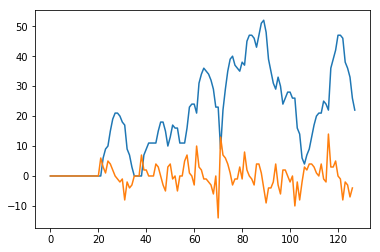

In [29]:
colsums = np.squeeze(Y_train[ix]).sum(axis=0)
plt.plot(colsums)
plt.plot(colsums[1:] - colsums[:-1])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


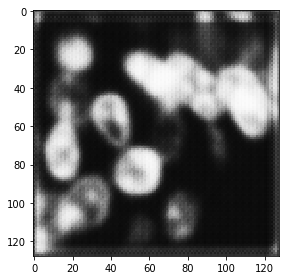

In [53]:
imshow(np.squeeze(predicted_1[ix]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


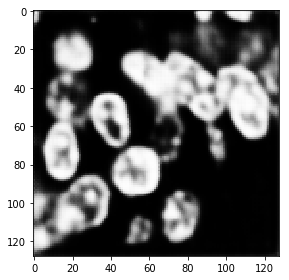

In [54]:
imshow(np.squeeze(predicted_2[ix]))

In [37]:
acc_2 = np.mean(np.squeeze(np.abs(Y_train - predicted_2)), axis=(1, 2))

In [38]:
acc_2[:10]
# Interesting indices 6 and 7

array([0.04806268, 0.047452  , 0.00689076, 0.05035172, 0.02980975,
       0.10703744, 0.10316637, 0.17804623, 0.11922193, 0.02537748],
      dtype=float32)

In [49]:
np.squeeze(predicted_2[ix]).shape

(128, 128)

In [4]:
img, mask = sources.raw_trainset(7)

In [5]:
img.shape

(256, 320, 4)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


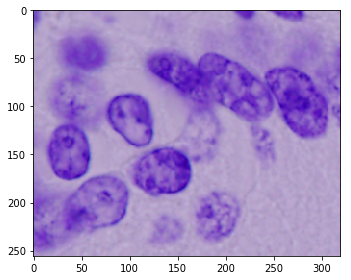

In [6]:
imshow(img)

In [7]:
mask[0].shape

(256, 320)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


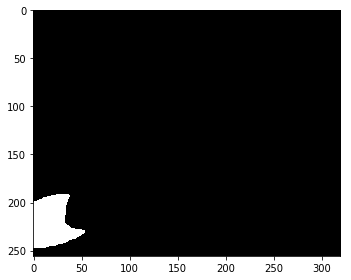

In [8]:
imshow(mask[7])

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


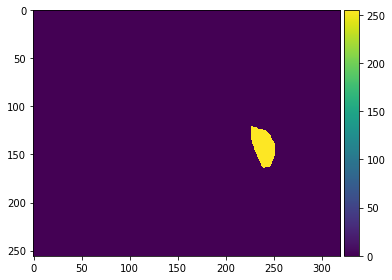

In [25]:
imshow(mask[1])

In [19]:
x_mask = np.max(mask[0], axis=0)
x_mask.argmax(), np.flip(x_mask, axis=0).argmax()

(241, 13)

In [3]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

tx, ty, tc, tw, th, tdx, tdy, _, _ = sources.flattened_trainset_ex(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS, 64)

100%|██████████| 64/64 [00:32<00:00,  1.95it/s]


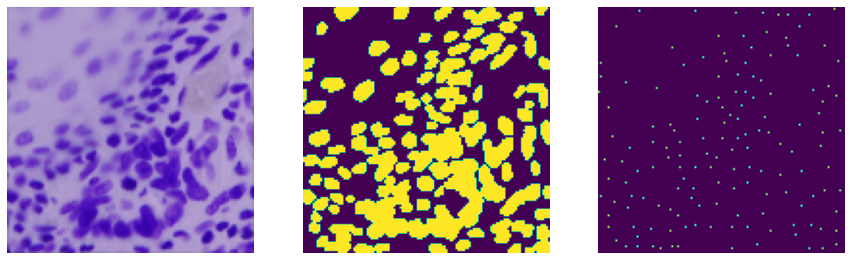

In [11]:
ix = 12
show_imgs([X_train[ix], Y_train[ix], tc[ix]])

In [ ]:
# collect code

n = 14
diffx = np.squeeze(pred_ext[4][n])
diffy = np.squeeze(pred_ext[5][n])
glagla = ((np.abs(diffx) < 1) & (np.abs(diffy) < 1)).astype('float')
widths = np.squeeze(pred_ext[2][n])
heights = np.squeeze(pred_ext[3][n])

rows, cols = np.where((np.abs(diffx) < 1) & (np.abs(diffy) < 1))
brects = [(x, y, widths[y, x], heights[y, x]) for (y, x) in zip(rows, cols) if widths[y, x] > 2 and heights[y, x] > 2]
rects = [(max(0, x - w/2), max(0, y - h/2), x + w/2, y + h/2) for (x, y, w, h) in brects]

mask_pred = pred_ext[0][n]
rects = [(x1, y1, x2, y2) for (x1, y1, x2, y2) in rects if mask_pred[int(y1):int(y2), int(x1):int(x2)].mean() >= 0.5]
rects = sorted(rects)

rects = rect.merge(rects)

import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.squeeze(pred_ext[0][n]))

for (x1, y1, x2, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((int(x1),int(y1)),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [104]:
model = unetmodel.u_net_model_ext(IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

In [116]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystopper = EarlyStopping(patience=5, verbose=1)
checkpointer = ModelCheckpoint(sources.MODEL_PATH + '/model-dsbowl2018-unet-ext-1.h5', verbose=1, save_best_only=True)
results = model.fit(tx,
                    [ty, tc, tw, th, tdx, tdy],
                    validation_split=0.1,
                    batch_size=16,
                    epochs=4,
                    callbacks=[earlystopper, checkpointer])

Train on 603 samples, validate on 67 samples
Epoch 1/4
603/603 [==============================] - 489s 811ms/step - loss: 2.7182 - mask_loss: 0.2309 - centers_loss: 0.0253 - widths_loss: 0.0809 - heights_loss: 0.0802 - diffx_loss: 1.0197 - diffy_loss: 1.2812 - val_loss: 2.1989 - val_mask_loss: 0.2405 - val_centers_loss: 0.0259 - val_widths_loss: 0.0782 - val_heights_loss: 0.0763 - val_diffx_loss: 0.7584 - val_diffy_loss: 1.0197

Epoch 00001: val_loss improved from inf to 2.19893, saving model to /data/models/model-dsbowl2018-unet-ext-1.h5
Epoch 2/4
603/603 [==============================] - 477s 792ms/step - loss: 2.2071 - mask_loss: 0.1823 - centers_loss: 0.0208 - widths_loss: 0.0734 - heights_loss: 0.0731 - diffx_loss: 0.8508 - diffy_loss: 1.0068 - val_loss: 1.8669 - val_mask_loss: 0.1792 - val_centers_loss: 0.0180 - val_widths_loss: 0.0689 - val_heights_loss: 0.0675 - val_diffx_loss: 0.6099 - val_diffy_loss: 0.9233

Epoch 00002: val_loss improved from 2.19893 to 1.86686, saving mode

In [117]:
pred_ext = model.predict(tx)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


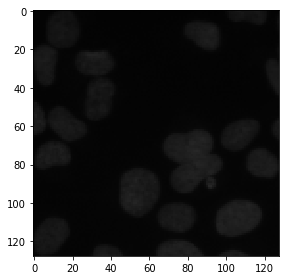

In [118]:
imshow(np.squeeze(tx[14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


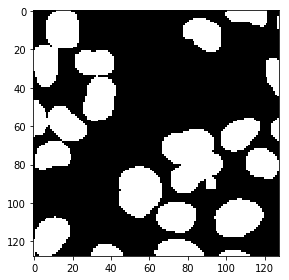

In [119]:
imshow(np.squeeze(ty[14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


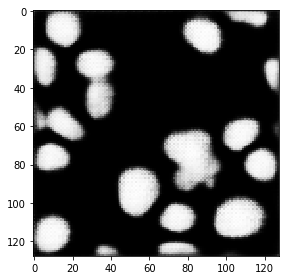

In [120]:
imshow(np.squeeze(pred_ext[0][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


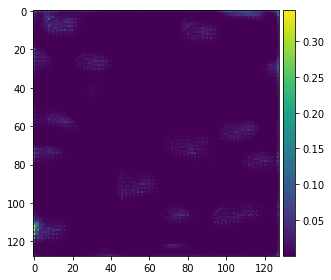

In [121]:
imshow(np.squeeze(pred_ext[1][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


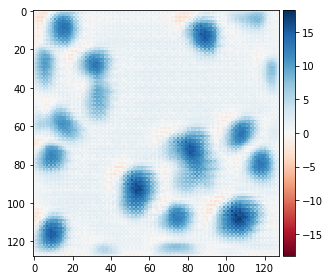

In [122]:
imshow(np.squeeze(pred_ext[2][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


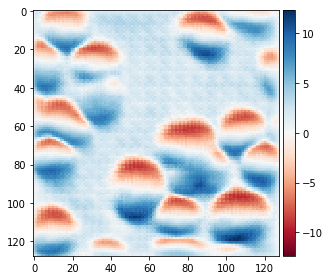

In [123]:
imshow(np.squeeze(pred_ext[5][14]))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


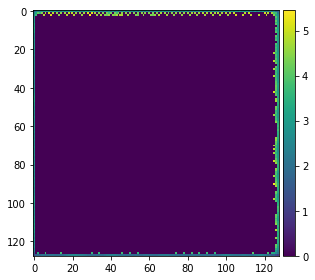

In [11]:
xx = np.squeeze(pred_ext[3][0])
pp = np.squeeze(pred_ext[1][0])
imshow(xx * (pp > 0.01).astype('float'))

In [132]:
np.max(pred_ext[2][3])

8.135359

In [55]:
img, mask = sources.raw_trainset(14)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


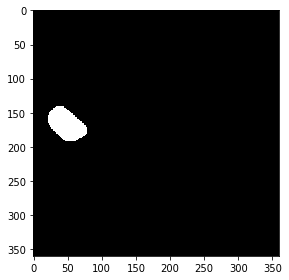

In [56]:
imshow(mask[0])

In [57]:
sources.inclusive_bounds(mask[0])

((21, 78), (140, 191))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


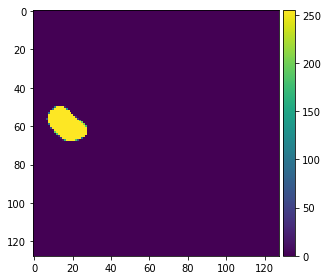

In [58]:
imshow(resize(mask[0], (IMG_WIDTH, IMG_HEIGHT), mode='constant', preserve_range=True))

In [72]:
sources.inclusive_bounds(resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


((8, 27), (50, 67))

In [21]:
mask[0].shape

(520, 696)

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


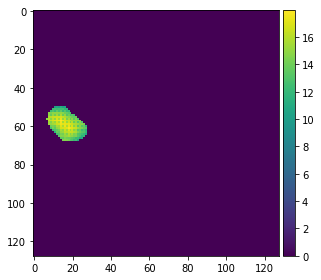

In [70]:
ixs = resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)) > 0
ww = np.squeeze(pred_ext[2][14])
imshow(ww * ixs.astype('float'))

/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "
/home/alexeyrodriguez/.local/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with

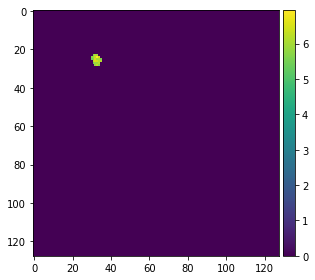

In [28]:
ixs = resize(mask[0], (IMG_WIDTH, IMG_HEIGHT)) > 0
hh = np.squeeze(pred_ext[3][0])
imshow(hh * ixs.astype('float'))

In [80]:
np.outer(np.arange(10),np.ones(2)).T - 4

array([[-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.],
       [-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.]])

In [81]:
np.outer(np.arange(10), np.ones(2))

array([[0., 0.],
       [1., 1.],
       [2., 2.],
       [3., 3.],
       [4., 4.],
       [5., 5.],
       [6., 6.],
       [7., 7.],
       [8., 8.],
       [9., 9.]])

In [82]:
np.outer(np.ones(2), np.arange(10))

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [ ]:
# collect code

n = 14
diffx = np.squeeze(pred_ext[4][n])
diffy = np.squeeze(pred_ext[5][n])
glagla = ((np.abs(diffx) < 1) & (np.abs(diffy) < 1)).astype('float')
widths = np.squeeze(pred_ext[2][n])
heights = np.squeeze(pred_ext[3][n])

rows, cols = np.where((np.abs(diffx) < 1) & (np.abs(diffy) < 1))
brects = [(x, y, widths[y, x], heights[y, x]) for (y, x) in zip(rows, cols) if widths[y, x] > 2 and heights[y, x] > 2]
rects = [(max(0, x - w/2), max(0, y - h/2), x + w/2, y + h/2) for (x, y, w, h) in brects]

mask_pred = pred_ext[0][n]
rects = [(x1, y1, x2, y2) for (x1, y1, x2, y2) in rects if mask_pred[int(y1):int(y2), int(x1):int(x2)].mean() >= 0.5]
rects = sorted(rects)

rects = rect.merge(rects)

import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.squeeze(pred_ext[0][n]))

for (x1, y1, x2, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((int(x1),int(y1)),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [287]:
n = 14
diffx = np.squeeze(pred_ext[4][n])
diffy = np.squeeze(pred_ext[5][n])
glagla = ((np.abs(diffx) < 1) & (np.abs(diffy) < 1)).astype('float')
widths = np.squeeze(pred_ext[2][n])
heights = np.squeeze(pred_ext[3][n])

In [288]:
rows, cols = np.where((np.abs(diffx) < 1) & (np.abs(diffy) < 1))
brects = [(x, y, widths[y, x], heights[y, x]) for (y, x) in zip(rows, cols) if widths[y, x] > 2 and heights[y, x] > 2]
rects = [(max(0, x - w/2), max(0, y - h/2), x + w/2, y + h/2) for (x, y, w, h) in brects]

In [289]:
mask_pred = pred_ext[0][n]
rects = [(x1, y1, x2, y2) for (x1, y1, x2, y2) in rects if mask_pred[int(y1):int(y2), int(x1):int(x2)].mean() >= 0.5]
rects = sorted(rects)

In [290]:
rects = rect.merge(rects)

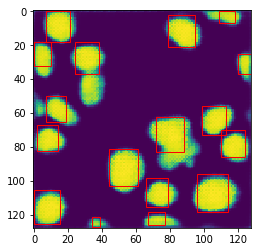

In [291]:
import matplotlib.patches as patches
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(np.squeeze(pred_ext[0][n]))

for (x1, y1, x2, y2) in rects:
    # Create a Rectangle patch and add patch to Axes
    ax.add_patch(patches.Rectangle((int(x1),int(y1)),int(x2-x1),int(y2-y1),linewidth=1,edgecolor='r',facecolor='none'))

plt.show()

In [ ]:
# TODO
# Square post processing (merging)
# Eliminate
# Metrics!